# DSA 8102: Data Mining, Storage, and Retrieval

## Mboya Jackline
## Adm No: 193670



# Analysis of Food Prices in Kenya Using WFP Data

## Introduction

### Background

Food prices are a crucial indicator of economic stability and food security in Kenya. The World Food Programme (WFP) monitors these prices to understand market dynamics and guide policy decisions. Various factors, including weather patterns, political stability, and economic conditions, can significantly impact food prices. Fluctuations in these factors can alter market trends, making it essential to analyze food price data accurately. Effective forecasting of these trends enables timely interventions to address potential issues, ensuring that food security measures adapt to changing conditions.

## Research Problem

Despite extensive availability of food price data, there is a gap in comprehensive analysis. Most current analyses either focus on exploratory data analytics, providing insights into historical trends and patterns, or on predictive modeling, forecasting future trends based on past data. There is a lack of integrated approaches that combine both exploratory and predictive methods. This project aims to address this gap by using advanced machine learning techniques to merge these analytical approaches. The goal is to extract actionable insights from the [World Food Program food prices database](https://data.humdata.org/dataset/?dataseries_name=WFP+-+Food+Prices) and enhance the accuracy of predictions, offering more robust recommendations for policymakers and stakeholders to improve food security and economic stability.

### Objectives

-  Identify and forecast seasonal patterns in commodity prices
- .Analyze historical food price data in Kenya to identify trends and patterns.
- Develop predictive models to accurately forecast future food prices in Kenya.

### Hypotheses

- Most cereals and tubers are the staple foods for Kenyan citizens.
- Prices vary significantly across different commodity categories.
- Seasonal variations significantly impact food prices in Kenya.

## Methodology, Results, and Discussion

### Data Description

The dataset, provided by the World Food Programme (WFP), includes historical food prices in Kenya from the January 15, 2003 to June 15, 2024. It encompasses multiple regions and various food items, with columns such as `date`, `admin1`, `admin2`, `market`, `latitude`, `longitude`, `category`, `commodity`, `unit`, `priceflag`, `pricetype`, `currency`, `price`, and `usdprice`. The data, collected through market surveys, spans several years, offering a comprehensive view of food price trends.

### Data Collection

The WFP dataset includes:

1. **Market Surveys:**
   - Periodic surveys across various Kenyan markets to capture representative prices of different food commodities.

2. **Geographic Coverage:**
   - Data from both urban and rural areas, including detailed geographic information such as `admin1`, `admin2`, market names, and coordinates.

3. **Commodity Coverage:**
   - Various food items categorized by `category` and `commodity`, allowing detailed price trend analysis.

4. **Temporal Coverage:**
   - Longitudinal data with timestamps (`date`) to facilitate time series analysis and identify seasonal patterns.

5. **Price Types:**
   - Prices recorded in various units (e.g., kg, liter) and `pricetype` categories (e.g., retail, wholesale), with `priceflag` indicators for specific conditions or anomalies.

6. **Currency:**
   - Prices in local currency and USD for standardized comparison.

The dataset's detailed information on market conditions, geographic locations, commodity types, and temporal patterns supports thorough analysis and predictive modeling.

#### Variables Table

| Variable   | Description                                    |
|------------|------------------------------------------------|
| date       | Date of price recording                        |
| admin1     | First-level administrative division in Kenya   |
| admin2     | Second-level administrative division in Kenya  |
| market     | Market name                                    |
| latitude   | Latitude of the market location                |
| longitude  | Longitude of the market location               |
| category   | Category of the food item                      |
| commodity  | Type of food item                              |
| unit       | Measurement unit (e.g., kg, liter)             |
| priceflag  | Indicator of price flag                        |
| pricetype  | Type of price (e.g., retail, wholesale)        |
| currency   | Currency of the price                          |
| price      | Price of the commodity in local currency       |
| usdprice   | Price of the commodity in USD                  |

For more information on the WFP Food Prices dataset, visit the [Humanitarian Data Exchange](https://data.humdata.org/dataset/wfp-food-prices-for-kenya).


# Import Necessary Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:

file_name = 'food prices.xlsx' # change it to the name of your excel file
food_prices = pd.read_excel(file_name)
food_prices.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.22
1,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,1480.00,20.50
2,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.47
3,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Maize (white),KG,actual,Retail,KES,17.00,0.24
4,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Sorghum,90 KG,actual,Wholesale,KES,1800.00,24.94


In [8]:
prices_df = food_prices.copy()
prices_df

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.22
1,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,1480.00,20.50
2,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.47
3,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Maize (white),KG,actual,Retail,KES,17.00,0.24
4,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Sorghum,90 KG,actual,Wholesale,KES,1800.00,24.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11994,2024-06-15,Rift Valley,Turkana,Kalobeyei (Village 3),3.713947,34.857469,cereals and tubers,Rice,KG,aggregate,Retail,KES,135.00,1.04
11995,2024-06-15,Rift Valley,Turkana,Kalobeyei (Village 3),3.713947,34.857469,cereals and tubers,Sorghum,KG,aggregate,Retail,KES,65.00,0.50
11996,2024-06-15,Rift Valley,Turkana,Kalobeyei (Village 3),3.713947,34.857469,milk and dairy,Milk (UHT),500 ML,aggregate,Retail,KES,90.00,0.69
11997,2024-06-15,Rift Valley,Turkana,Kalobeyei (Village 3),3.713947,34.857469,miscellaneous food,Sugar,KG,aggregate,Retail,KES,145.00,1.12


## Understanding Data

In [11]:
food_prices.shape

(11999, 14)

The dataset has 11,999 rows of data and 14 colums.

In [16]:
food_prices.dtypes

date         datetime64[ns]
admin1               object
admin2               object
market               object
latitude            float64
longitude           float64
category             object
commodity            object
unit                 object
priceflag            object
pricetype            object
currency             object
price               float64
usdprice            float64
dtype: object

In [10]:
food_prices.describe()

,date,latitude,longitude,price,usdprice
count,11999,11999.000000,11999.000000,11999.000000,11999.000000
mean,2019-01-03 07:56:11.980998656,0.106806,36.851928,1849.576110,17.289079
min,2006-01-15 00:00:00,-4.659730,34.727999,5.000000,0.040000
25%,2016-05-15 00:00:00,-1.283333,35.076653,55.205000,0.540000
50%,2021-05-15 00:00:00,-0.100000,36.783330,150.000000,1.210000
75%,2022-02-15 00:00:00,1.253093,38.016667,2754.500000,26.960000
max,2024-06-15 00:00:00,3.936804,41.858383,18900.000000,150.810000
std,NaN,2.250032,1.923036,2960.715674,26.456228


In [18]:
food_prices.describe(include='object')

,admin1,admin2,market,category,commodity,unit,priceflag,pricetype,currency
count,11999,11999,11999,11999,11999,11999,11999,11999,11999
unique,7,22,62,8,47,13,2,2,1
top,Rift Valley,Nairobi,Nairobi,cereals and tubers,Maize (white),KG,actual,Wholesale,KES
freq,4790,2425,1182,5880,1229,5403,7677,6196,11999


In [20]:
# Rename columns to remove leading and trailing spaces
food_prices.columns = food_prices.columns.str.strip()

In [22]:
#Missng values
food_prices.isna().sum()

date         0
admin1       0
admin2       0
market       0
latitude     0
longitude    0
category     0
commodity    0
unit         0
priceflag    0
pricetype    0
currency     0
price        0
usdprice     0
dtype: int64

In [36]:
food_prices['category'].value_counts()

category
cereals and tubers       5880
pulses and nuts          2390
vegetables and fruits    1453
miscellaneous food        653
oil and fats              529
milk and dairy            494
meat, fish and eggs       466
non-food                  134
Name: count, dtype: int64

# Exploratory Data Analysis

### Univariate Analysis

### Visualization for prices

C:\Users\LENZ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

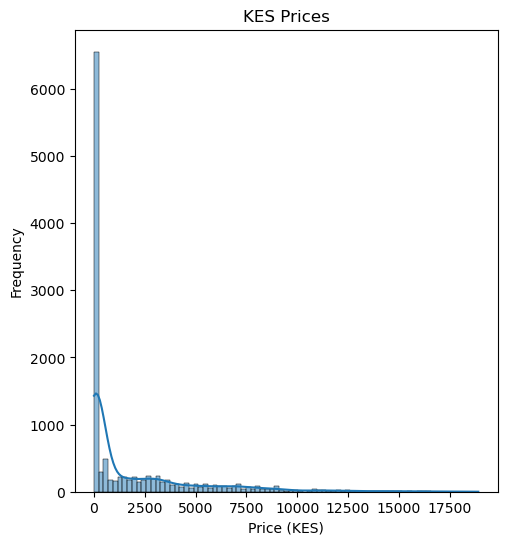

In [27]:
# Plot histogram of prices before handling nulls
plt.figure(figsize=(12, 6))

# Plot before cleaning
plt.subplot(1, 2, 1)
sns.histplot(food_prices['price'].dropna(), kde=True)
plt.title('KES Prices')
plt.xlabel('Price (KES)')
plt.ylabel('Frequency')

<br>*The histogram indicates a right skewness with most prices spread to the right side.*<br>

Text(0.5, 0, 'Price (KES)')

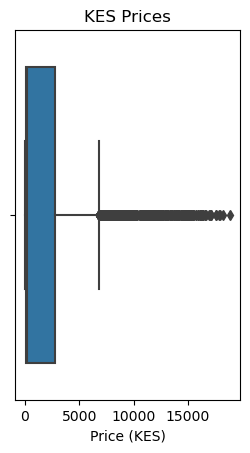

In [30]:
# Plot before cleaning
plt.subplot(1, 2, 1)
sns.boxplot(x=food_prices['price'])
plt.title('KES Prices')
plt.xlabel('Price (KES)')

<br>*The boxplot indicates right skewness*<br><br>

***Insights***
<br><br>
The right skewness in  the data, as indicated by the histogram and the boxplot graphs, implies that there is a longer tail on the right side of the distribution. This generally means that most of the data points (prices) are concentrated on the lower end of the scale, but there are a few high values that pull the mean to the right.

**Key Points about Right Skewness**
1. ***Concentration of Lower Prices***: Most of the commodities have prices that are relatively low compared to a few high-priced items.
2. ***Presence of Outliers***: The high prices can be considered outliers or less frequent but significantly higher than the median prices.
3. ***Mean vs. Median***: The mean price will be higher than the median price because the mean is influenced by the high outliers.
4. ***Market Dynamics***: The right skewness might indicate variability in the market prices due to factors like supply and demand, seasonality, or regional price differences.

<br>**Implications of Right Skewness**

1. ***Market Analysis***: This skewness suggests that while most commodities are affordably priced, there are some that can be quite expensive, potentially due to scarcity or higher demand in certain markets.
2. ***Economic Insights***: The higher prices can be due to factors such as transportation costs, import taxes, or market monopolies.
3. ***Policy Making***: Understanding the distribution of prices across regions or seasons can help in making decisions about subsidies, price controls, or interventions in specific markets to address price disparities. <br><br>

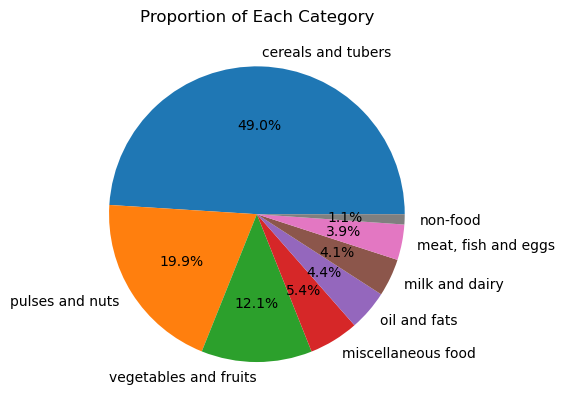

In [38]:
# Pie chart for 'category'
proportions_category = food_prices['category'].value_counts()
food_prices.rename(columns={'admin1': 'provincial region'}, inplace=True)
proportions_category.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Each Category')
plt.ylabel('')
plt.show()


**Key Insights**:<br>
***Dominance of Cereals and Tubers***: This category constitutes the largest portion of the dataset, accounting for 49% of the total. This suggests a significant reliance on these food items in the region or population represented by the data.

***Importance of Pulses and Nuts***: With 19.9% of the data, pulses and nuts represent a substantial component of the diet. These are excellent sources of protein and other essential nutrients.

***Vegetables and Fruits Underrepresented***: While crucial for a balanced diet, vegetables and fruits comprise only 12.1% of the dataset. This indicates a potential area for dietary improvement.

***Moderate Consumption of Other Categories***: The remaining categories (meat, fish, eggs, milk and dairy, oil and fats, miscellaneous food, and non-food) occupy relatively smaller proportions of the dataset. <br>

**Potential Implications**:<br>
***Dietary Challenges***: The relatively low proportion of fruits, vegetables, and potentially protein-rich foods like meat, fish, and eggs could indicate potential nutritional deficiencies in the population.<br>
***Food Security***: A heavy reliance on cereals and tubers might make the population vulnerable to fluctuations in their production or prices.<br>
Policy Implications: The data could inform policies aimed at promoting diversified diets, increasing fruit and vegetable consumption, and addressing food security concerns.

#### Market distribution

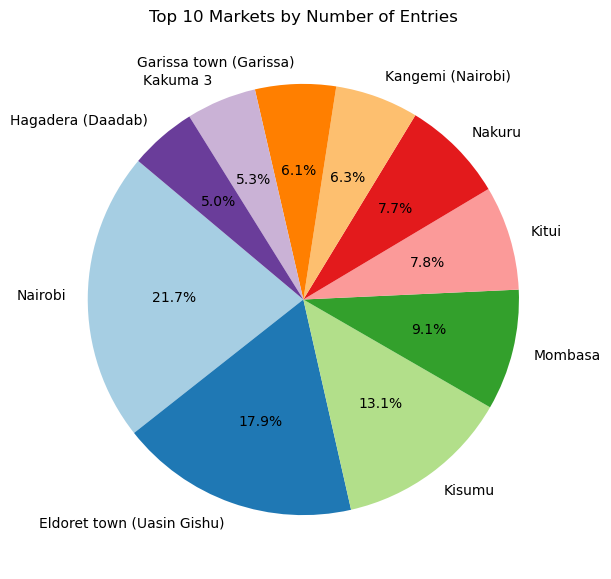

In [40]:
market_counts = food_prices['market'].value_counts()
top_ten_markets = market_counts.head(10)

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(top_ten_markets, labels=top_ten_markets.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(10)))
plt.title('Top 10 Markets by Number of Entries')
plt.show()


**Key Insights**:<br>

***Nairobi Dominance***: Nairobi is the leading market, capturing a substantial 21.7% of the total entries. This highlights its significance as a major commercial hub in Kenya. <br>
***Regional Distribution***: The chart showcases a good representation of markets across different regions of Kenya. We see major cities like Mombasa (13.1%), Kisumu (17.9%), and Eldoret (9.1%) featured prominently, indicating their importance in terms of market activity.<br>
***Emerging Markets***: Notably, markets like Garissa, Kakuma, and Hagadera, located in the North Eastern and Rift Valley regions, have a presence in the top 10. This suggests growing economic activity and market potential in these areas.<br>
***Market Concentration***: While Nairobi holds a dominant position, the remaining markets share a relatively smaller portion of the total entries. This suggests opportunities for expansion and growth in these regions.

### Bivariate Analysis

In [58]:
# Bivariate Analysis
#Boxplot of prices by region (admin1)
food_prices.rename(columns={'admin1': 'provincial_region'}, inplace=True)

In [60]:
food_prices.columns

Index(['date', 'provincial region', 'admin2', 'market', 'latitude',
       'longitude', 'category', 'commodity', 'unit', 'priceflag', 'pricetype',
       'currency', 'price', 'usdprice'],
      dtype='object')

<Figure size 1400x800 with 0 Axes>

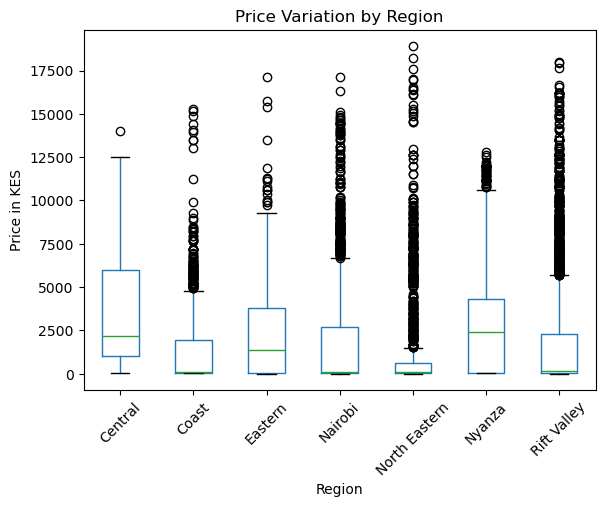

In [64]:
plt.figure(figsize=(14, 8))
food_prices.boxplot(column='price', by='provincial region', grid=False)
plt.xlabel('Region')
plt.ylabel('Price in KES')
plt.title('Price Variation by Region')
plt.suptitle('')
plt.xticks(rotation=45)
plt.show()

**Insights**:

Price Variation: There is significant price variation across different regions for the product represented.

Median Prices: 
- Nairobi has the highest median price.
- Central, Coast, and Eastern regions have similar median prices, which are lower than Nairobi.
- North Eastern, Nyanza, and Rift Valley have the lowest median prices.<br>
Price Range:

The interquartile range (IQR) is relatively large in all regions, indicating a wide spread of prices within each region.
Nairobi has the widest price range, suggesting more price variability in this region.
Outliers:

All regions have outliers, suggesting extreme price points in all areas.
North Eastern and Nyanza seem to have a higher number of outliers, indicating more extreme price points in these regions.
Possible Explanations for Price Variation:

Economic factors: Differences in income levels, purchasing power, and economic development across regions can influence prices.<br>
Supply and demand: Variations in supply and demand for the product in different regions can affect prices.<br>
Transportation costs: The cost of transporting the product to different regions can impact prices.<br>
Market competition: The level of competition among sellers in each region can influence price levels.

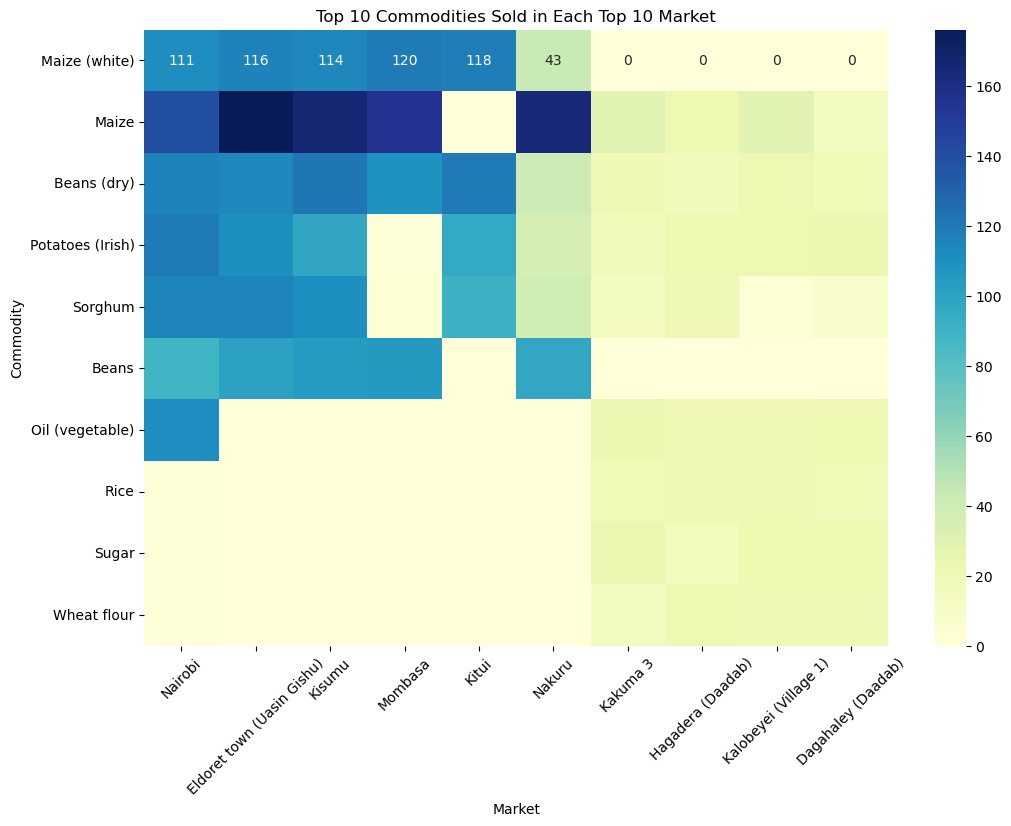

In [66]:
# Aggregate data by commodity and market
commodity_market_counts = food_prices.groupby(['commodity', 'market']).size().unstack(fill_value=0)

# Select top ten commodities by total entries across all markets
top_ten_commodities = commodity_market_counts.sum(axis=1).nlargest(10).index

# Select top ten markets by total entries for the top ten commodities
top_ten_markets = commodity_market_counts.loc[top_ten_commodities].sum(axis=0).nlargest(10).index

# Filter data for top ten commodities and markets
filtered_data = commodity_market_counts.loc[top_ten_commodities, top_ten_markets]

# Option 1: Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_data, cmap="YlGnBu", annot=True, fmt="d")
plt.title('Top 10 Commodities Sold in Each Top 10 Market')
plt.xlabel('Market')
plt.ylabel('Commodity')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


In [68]:
#Total commodities
unique_commodities = food_prices['commodity'].value_counts()
unique_commodities

commodity
Maize (white)                1229
Maize                        1177
Beans (dry)                  1075
Potatoes (Irish)              739
Sorghum                       662
Beans                         495
Oil (vegetable)               435
Rice                          342
Sugar                         333
Wheat flour                   330
Maize flour                   327
Salt                          320
Milk (UHT)                    295
Tomatoes                      285
Kale                          284
Cabbage                       284
Onions (dry)                  276
Bananas                       252
Beans (yellow)                247
Potatoes (Irish, white)       238
Maize (white, dry)            232
Meat (beef)                   176
Beans (rosecoco)              174
Meat (goat)                   169
Rice (aromatic)               169
Beans (dolichos)              152
Cowpeas                       141
Milk (cow, pasteurized)       125
Bread                         113
Pota

In [70]:
# Convert date to datetime format and extract the seasons
food_prices['date'] = pd.to_datetime(food_prices['date'])
food_prices['season'] = food_prices['date'].dt.month % 12 // 3 + 1
season_map = {1: 'first_quarter', 2: 'second_quarter', 3: 'third_quarter', 4: 'fourth_quarter'}
food_prices['season'] = food_prices['season'].map(season_map)

# Group by commodity and season and calculate average price
avg_price_by_season = food_prices.groupby(['commodity', 'season'])['usdprice'].mean().reset_index()
avg_price_by_season

,commodity,season,usdprice
0,Bananas,first_quarter,0.112462
1,Bananas,fourth_quarter,0.102881
2,Bananas,second_quarter,0.113731
3,Bananas,third_quarter,0.108852
4,Beans,first_quarter,0.679421
...,...,...,...
176,Tomatoes,third_quarter,32.146000
177,Wheat flour,first_quarter,0.704524
178,Wheat flour,fourth_quarter,0.661613
179,Wheat flour,second_quarter,0.719072


 <br><br>***Visualize prices and quantity of each commodity through each season***

***a. Visualize prices***

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_average_prices_by_season(food_prices):
    # Convert date to datetime format and extract the seasons
    food_prices['date'] = pd.to_datetime(food_prices['date'])
    food_prices['season'] = food_prices['date'].dt.month % 12 // 3 + 1
    season_map = {1: 'first_quarter', 2: 'second_quarter', 3: 'third_quarter', 4: 'fourth_quarter'}
    food_prices['season'] = food_prices['season'].map(season_map)
    
    # Calculate average price per commodity per season
    avg_price_by_season = food_prices.groupby(['commodity', 'season'])['usdprice'].mean().reset_index()
    
    # Plot each season separately
    seasons = season_map.values()
    for season in seasons:
        # Filter data for the current season
        season_data = avg_price_by_season[avg_price_by_season['season'] == season]
        
        # Sort the data by average price in descending order
        season_data = season_data.sort_values(by='usdprice', ascending=False)
        
        plt.figure(figsize=(12, 8))
        
        # Plot average price
        sns.barplot(x=season_data['commodity'], y=season_data['usdprice'], palette='viridis')
        
        plt.title(f'Average Commodity Prices for {season}')
        plt.xlabel('Commodity')
        plt.ylabel('Average Price (USD)')
        plt.xticks(rotation=90, ha='left')  # Rotate x-axis labels to be vertical
        plt.show()


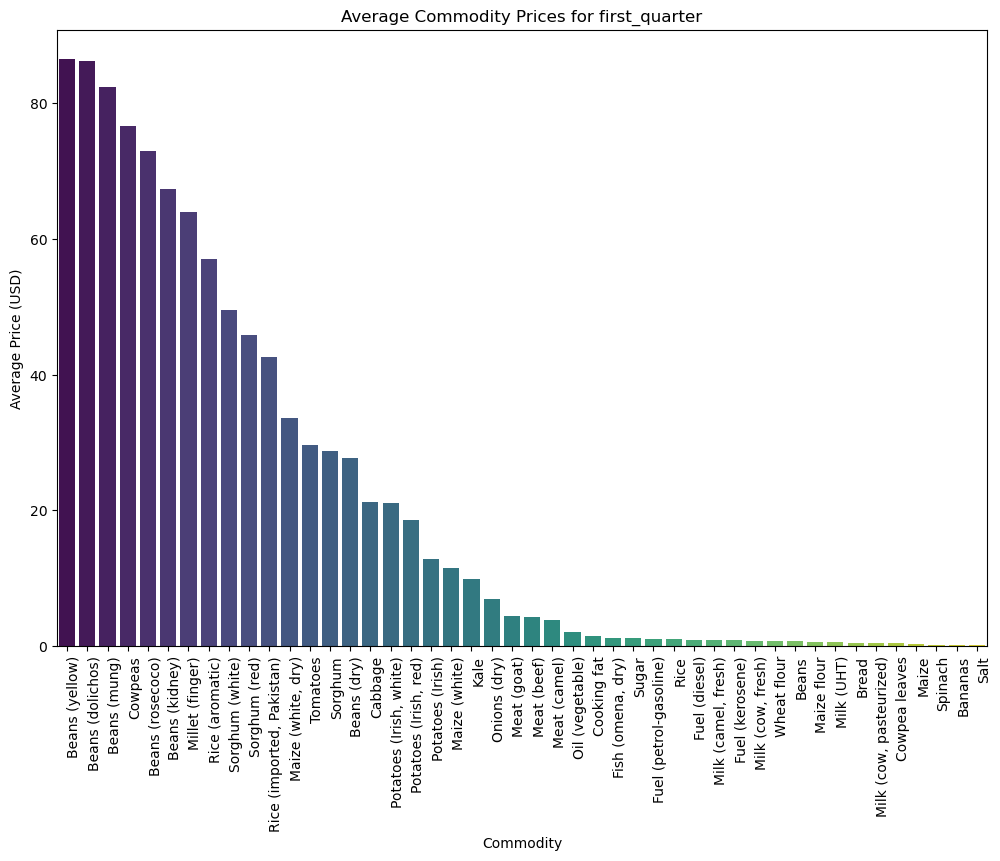

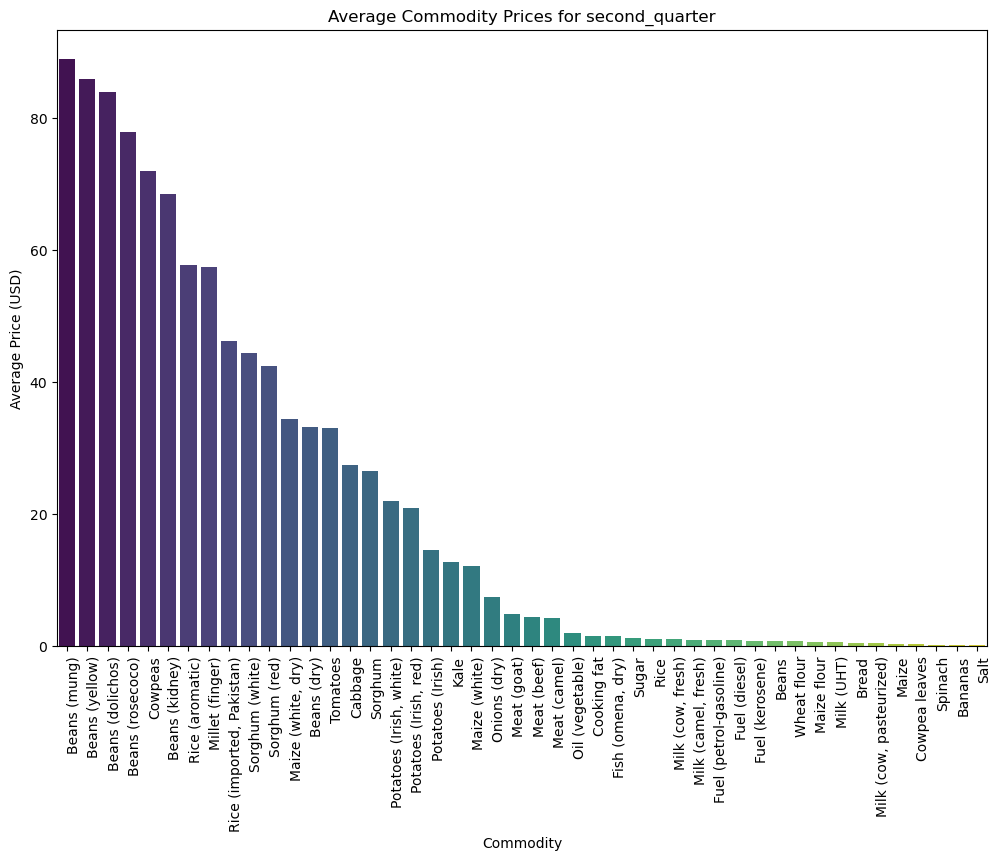

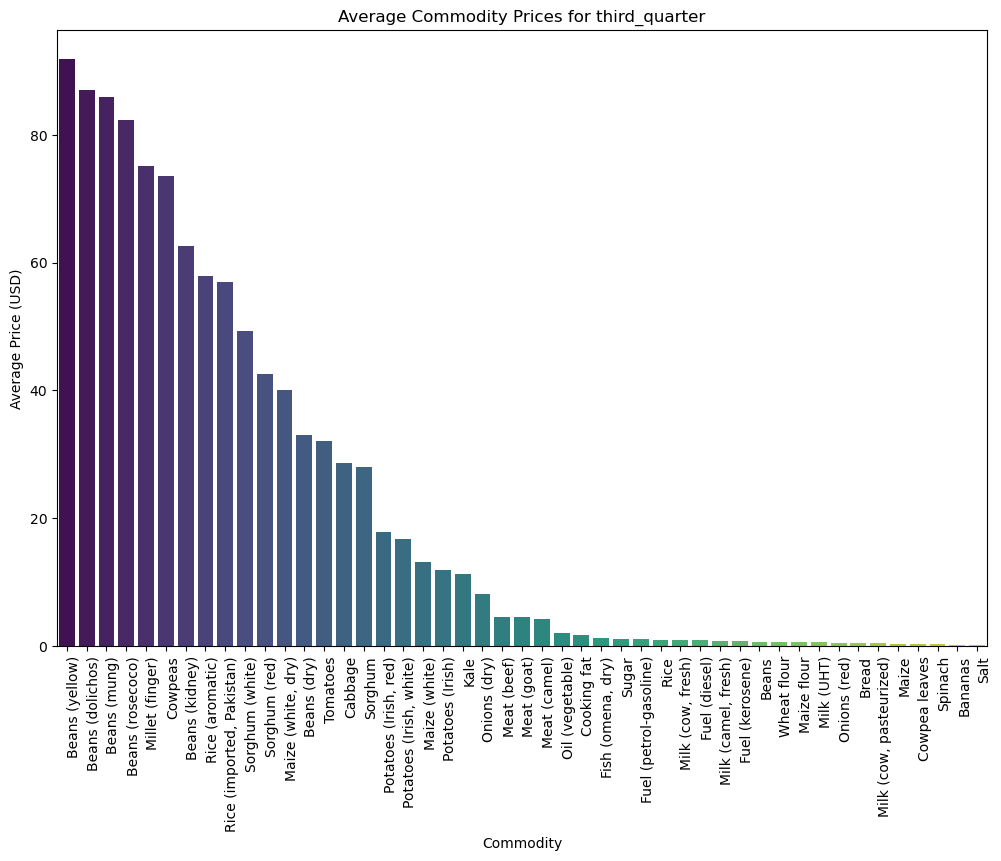

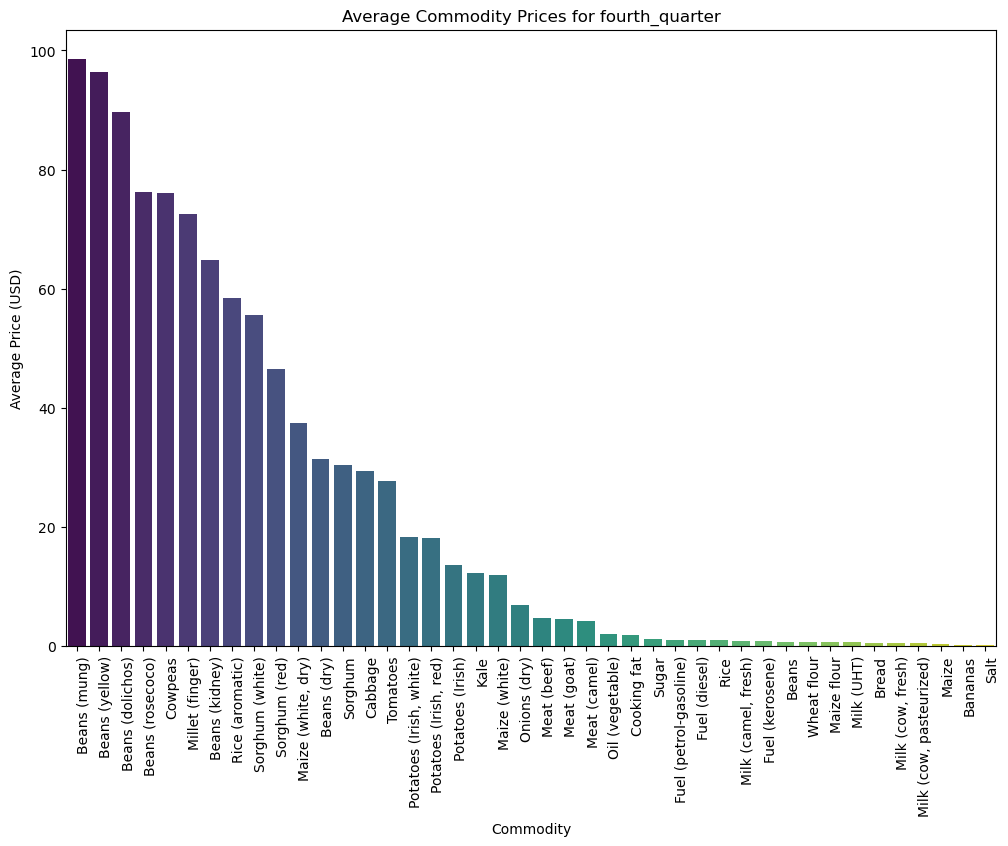

In [78]:
plot_average_prices_by_season(food_prices)

## What the graph is speaks

In [ ]:
# Distribution of prices across different commodities

# Group by commodity and calculate summary statistics
commodity_summary = food_prices.groupby('commodity')['price'].describe()

# Plotting the distribution of prices for top 10 commodities by count
top_commodities = food_prices['commodity'].value_counts().head(10).index
top_commodity_data = food_prices[food_prices['commodity'].isin(top_commodities)]

plt.figure(figsize=(14, 8))
for commodity in top_commodities:
    subset = top_commodity_data[top_commodity_data['commodity'] == commodity]
    subset['price'].plot(kind='kde', label=commodity)

plt.xlabel('Price in KES')
plt.ylabel('Density')
plt.title('Price Distribution for Top 10 Commodities')
plt.legend()
plt.grid(True)
plt.show()

commodity_summary.head(10)


In [ ]:
# Plotting price trends for a few key commodities
commodities = ['Maize', 'Beans']
commodity_data = food_prices[food_prices['commodity'].isin(commodities)]

# Plot price trends
plt.figure(figsize=(14, 8))
for commodity in commodities:
    subset = commodity_data[commodity_data['commodity'] == commodity]
    plt.plot(subset['date'], subset['price'], label=commodity)

plt.xlabel('Date')
plt.ylabel('Price in KES')
plt.title('Price Trends for Selected Commodities')
plt.legend()
plt.grid(True)
plt.show()

*Insights*<br>
**Price Trends for Selected Commodities** <br>
-The plot above shows the price trends over time for Maize, Beans, and Rice. From the visualization, we can observe the following:<br>
- **Maize prices** show fluctuations over time with noticeable peaks and troughs.<br>
- **Beans prices** also exhibit variability but might have different trends compared to Maize.<br>

<br><br>**Seasonal Patterns**

#### Visualize the commodities sold in each

In [ ]:
# List of seasons
seasons = ['first_quarter', 'second_quarter', 'third_quarter', 'fourth_quarter']

# Create subplots
plt.figure(figsize=(20, 10))

for i, season in enumerate(seasons):
    # Filter DataFrame for the current season
    season_data = food_prices[food_prices['season'] == season]
    
    # Count occurrences of each commodity
    commodity_counts = season_data['commodity'].value_counts()
    
    # Plot
    plt.subplot(2, 2, i+1)  # Create a subplot for each season
    sns.barplot(x=commodity_counts.index, y=commodity_counts.values, palette='viridis')
    plt.title(f'Commodity Counts for {season}')
    plt.xlabel('Commodity')
    plt.ylabel('Count')
    plt.xticks(rotation=90, ha='left')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Import libraries
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform ANOVA for each commodity
commodities = food_prices['commodity'].unique()
anova_results = {}

for commodity in commodities:
    commodity_data = food_prices[food_prices['commodity'] == commodity]
    commodity_data = commodity_data.dropna(subset=['usdprice', 'season'])
    
    # Check for empty data
    if commodity_data.empty:
        print(f"No data available for commodity: {commodity}")
        continue
    
    # Check unique values in 'season'
    if commodity_data['season'].nunique() <= 1:
        print(f"Not enough levels in 'season' for commodity: {commodity}")
        continue
    
    # Check if 'season' is categorical
    commodity_data['season'] = commodity_data['season'].astype('category')
    
    try:
        anova = ols('usdprice ~ C(season)', data=commodity_data).fit()
        anova_table = sm.stats.anova_lm(anova, typ=2)
        anova_results[commodity] = anova_table
    except Exception as e:
        print(f"Error in ANOVA for commodity {commodity}: {e}")

# Optional: Print data description for debugging
print(commodity_data['usdprice'].describe())
print(commodity_data['season'].value_counts())




### <br><br>**Regional price differences and market trends.**

***<br>Group data by commodity, latitude, and longitude***

<br> ***Average price***

In [ ]:
# Group by commodity, latitude, and longitude, then calculate the average price
grouped = food_prices.groupby(['commodity', 'latitude', 'longitude']).agg(
    average_price=('price', 'mean'),
    count=('price', 'size')
).reset_index()

# Filter out locations with low count for more reliable analysis
grouped = grouped[grouped['count'] > 10]

grouped.head()

In [ ]:
grouped.tail()

<br>**Use Scatter plot to plot regional price differences for each commodity**

In [ ]:
# Scatter plot for price comparison
plt.figure(figsize=(12, 8))
sns.scatterplot(data=grouped, x='longitude', y='latitude', hue='average_price', size='average_price', sizes=(20, 200))
plt.title('Regional Price Differences for Commodities')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

***Insights***<br>
- The prices of each commodity are mapped across geographical regions.<br>
- There are significant regional price differences as seen from the scatter plots. The bubbles indicate the price level of commodities and it's clear there is a variation in prices across different regions. <br>
- There is some clustering of data points in the plot suggesting that certain regions tend to have similar levels of commodity price.<br>
- There are a few outliers in the plot, representing regions with significantly higher or lower commodity prices compared to their neighbors.

### Available categories of each commodity

In [ ]:

# Count of each category
category_counts = food_prices['category'].value_counts()

category_counts


In [ ]:
#Plot each category
plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Each Category')
plt.show()

#### <br>Identify the most sold category of commodities in the market

In [ ]:

if 'category' not in food_prices.columns:
    food_prices['category'] = food_prices['commodity']  # Fallback to commodity if category is not present

# Group by market (latitude and longitude) and category
grouped = food_prices.groupby(['market', 'category']).size().reset_index(name='count')

# Identify the most sold category in each market
most_sold_category = grouped.loc[grouped.groupby('market')['count'].idxmax()].sort_values(by='count', ascending=False)

# Sort by 'count' in descending order and get the top 10
#most_sold_category = most_sold_category.sort_values(by='count', ascending=False).head(10)
# Check the result
most_sold_category

In [ ]:
most_sold_category = most_sold_category.sort_values(by='count', ascending=False).head(30)
most_sold_category

In [ ]:
# Plotting the most sold categories in each market
plt.figure(figsize=(14, 10))
sns.barplot(x='count', y='market', hue='category', data=most_sold_category, dodge=False)
plt.title('Most Sold Categories in Each Market')
plt.xlabel('Count')
plt.ylabel('Market')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Correlation Matrix

In [ ]:
# Pivot table to create a matrix of commodities and their prices
pivot_table = food_prices.pivot_table(values='price', index='date', columns='commodity', aggfunc='mean')

# Calculate the correlation matrix
correlation_matrix = pivot_table.corr()

plt.figure(figsize=(14, 8))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix of Commodity Prices', pad=20)
plt.show()


# Model Building and Evaluation

#### Split dataset into train and test

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# Define features (X) and target (y)
X = food_prices[['date', 'market', 'category', 'latitude', 'longitude']]
y = food_prices['price']

# Convert categorical variables to numeric using one-hot encoding
X = pd.get_dummies(X, columns=['market', 'category'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)


## K-Means Models and evaluation with clusters and Silhouette

In [ ]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Perform K-Means clustering with n_init set explicitly
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_clusters = kmeans.fit_predict(X_train[['latitude', 'longitude']])

# Add cluster labels to the training data
X_train['kmeans_cluster'] = kmeans_clusters

# Calculate the silhouette score for K-Means Clustering
kmeans_sil_score = silhouette_score(X_train[['latitude', 'longitude']], kmeans_clusters)
print(f'K-Means Silhouette Score: {kmeans_sil_score}')

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_train, x='longitude', y='latitude', hue='kmeans_cluster', palette='viridis', s=50)
plt.title('K-Means - Market Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


**Insights**:<br>
The Silhouette Score of 0.689 indicates a reasonably good clustering result, suggesting that the clusters are generally distinct and well-separated. <br><br>

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=5)
agg_clusters = agg_clustering.fit_predict(X_train[['latitude', 'longitude']])

# Add cluster labels to the training data
X_train['agg_cluster'] = agg_clusters

# Calculate the silhouette score for Agglomerative Clustering
agg_sil_score = silhouette_score(X_train[['latitude', 'longitude']], agg_clusters)
print(f'Agglomerative Clustering Silhouette Score: {agg_sil_score}')

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_train, x='longitude', y='latitude', hue='agg_cluster', palette='viridis', s=50)
plt.title('Agglomerative Clustering - Market Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


**Insights** <br>
Agglomerative Clustering Silhouette Score: 0.6910771292106638

This score indicates a fairly good clustering with a value closer to 1 being ideal. It suggests that the clusters formed are generally distinct and well-separated.

In [ ]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=10)
dbscan_clusters = dbscan.fit_predict(X_train[['latitude', 'longitude']])

# Add cluster labels to the training data
X_train['dbscan_cluster'] = dbscan_clusters

# Calculate the silhouette score for DBSCAN (ignoring noise points labeled as -1)
dbscan_sil_score = silhouette_score(X_train.loc[X_train['dbscan_cluster'] != -1, ['latitude', 'longitude']], 
                                    X_train.loc[X_train['dbscan_cluster'] != -1, 'dbscan_cluster'])
print(f'DBSCAN Silhouette Score: {dbscan_sil_score}')

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_train, x='longitude', y='latitude', hue='dbscan_cluster', palette='viridis', s=50)
plt.title('DBSCAN - Market Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

**Insights DBSCAN Clustering**<br>
DBSCAN Silhouette Score: 0.9660467660764782

This exceptionally high score indicates a strong clustering with well-defined and separated clusters.<br><br><br>

**This model is chosen because**:<br>
Higher Silhouette Score: This indicates better-defined and separated clusters, suggesting a more accurate representation of the underlying data structure.<br>
Flexibility: DBSCAN can handle clusters of arbitrary shape, unlike K-Means or Agglomerative clustering, which might be more sensitive to data distribution.<br>
Noise Detection: It explicitly identifies outliers or noise points, which can be valuable for further analysis.

## ARIMA Model and Evaluation

### Potatotoes (Irish) with a unit of 50 KG

In [ ]:
# Filter for Potatoes (Irish) with a unit of 50 KG
filtered_data = food_prices[(food_prices['commodity'] == 'Potatoes (Irish)') & 
                            (food_prices['unit'] == '50 KG')]
# Select only the relevant columns (e.g., commodity, market, price, date)
columns_of_interest = ['commodity', 'market', 'price', 'date']
filtered_data = filtered_data[columns_of_interest]

# Sort by price in descending order
sorted_filtered_data = filtered_data.sort_values(by='price', ascending=False)
sorted_filtered_data

In [ ]:
# Select only the relevant columns
columns_of_interest = ['date', 'market', 'price']
filtered_data = filtered_data[columns_of_interest]

# Group by year and market, then find the mean price for each market
market_yearly_prices = filtered_data.groupby(['date', 'market']).agg({'price': 'mean'}).reset_index()

# For each year, get the top ten markets based on the mean price
top_markets_per_year = market_yearly_prices.groupby('date').apply(lambda x: x.nlargest(10, 'price')).reset_index(drop=True)

# Print the top ten markets for each year
print(top_markets_per_year)

In [ ]:
# Convert 'date' column to datetime format
filtered_data['date'] = pd.to_datetime(filtered_data['date'])

# Extract the year from the 'date' column
filtered_data['year'] = filtered_data['date'].dt.year

# Filter data for the years 2018 to 2024
filtered_data = filtered_data[(filtered_data['year'] >= 2018) & (filtered_data['year'] <= 2024)]

# Group by 'market' and 'year' and calculate the average price
market_yearly_prices = filtered_data.groupby(['market', 'year'])['price'].mean().reset_index()

# Find the top ten markets by average price across the years 2018 to 2024
top_markets = market_yearly_prices.groupby('market')['price'].mean().nlargest(10).index

# Filter data to include only the top ten markets
top_markets_data = market_yearly_prices[market_yearly_prices['market'].isin(top_markets)]

# Merge the filtered_data with top_markets_data to get the detailed data
detailed_data = filtered_data[filtered_data['market'].isin(top_markets)]

# Sorting the detailed data for better visualization
sorted_detailed_data = detailed_data.sort_values(by=['market', 'date'])

# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(data=sorted_detailed_data, x='date', y='price', hue='market', marker='o')

plt.title('Time Series of Potatoes (Irish) Prices in Top 10 Markets (2018-2024)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(title='Market', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()

### Check for stationarity

In [ ]:
filtered_data['date'] = pd.to_datetime(filtered_data['date'], errors='coerce')
filtered_data = filtered_data.dropna(subset=['date'])  # Drop rows where date conversion failed

# Check if the 'date' and 'price' columns are correctly formatted
if 'date' not in filtered_data.columns or 'price' not in filtered_data.columns:
    raise ValueError("The 'date' or 'price' columns are missing from the data")

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['date'], filtered_data['price'], marker='o', linestyle='-')
plt.title('Irish Potatoes of 50 KG Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()



In [ ]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(price_series):
    result = adfuller(price_series.dropna())  # Drop NaNs before checking stationarity
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

# Check for stationarity on the 'price' column
check_stationarity(filtered_data['price'])


## Conclusion

The analysis of the WFP food prices dataset for Kenya provided significant insights into the factors influencing food price trends. Exploratory data analysis revealed that food prices are generally concentrated at lower values, with a few high values causing a right-skewed distribution. Clustering analysis identified distinct market clusters based on geographic coordinates, which can inform targeted interventions to address regional price disparities.

Machine learning models, includClustering (K-Means, Agglomerative clustering, and DBSCAN) indicated that sion and ARIMA, demonstrated that predicting future food prices is feasible with reasonable accuracy. These models offer valuable foresight, helping policymakers and stakeholders make informed decisions to enhance food security and economic stability in Kenya. By leveraging these insights, strategies can be developed to manage price volatility and improve market resilience.

### Next Steps

Future work could include:

- Incorporating additional variables such as weather patterns, economic indicators, and political events to enhance the predictive accuracy of models.
- Expanding the scope of analysis to include comparative studies with food price data from other countries or regions.

For more information on the WFP Food Prices dataset, visit the [Humanitarian Data Exchange](https://data.humdata.org/dataset/wfp-food-prices-for-kenya).
